<a href="https://colab.research.google.com/github/Baran-7/ari_ring/blob/main/airring_V07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the code to optimize airrinig and extracting the formula  
230 total data

In [2]:
import pandas as pd
import torch
from torch import nn
!pip install openpyxl
import torch.optim as optim
import numpy as np
import torch.optim as optim
!pip install pytorch-lightning
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-


*   importing data


In [42]:
#connecting to the one drive and I choosed agree on all the levels
from google.colab import drive
drive.mount('/content/drive')
#importing the exact folder name
file_path = "/content/drive/My Drive/air_ring/export airring data.xlsx"
#checking what is in the directory
#import os
# Adjust the path to your folder
#folder_path = "/content/drive/My Drive/air_ring"
#print(os.listdir(folder_path))
#loading the data
#data = pd.read_excel('/content/export airring data.xlsx'): the chat gpt's mistake :)))))
data = pd.read_excel('/content/drive/My Drive/air_ring/export airring data.xlsx')
ten_raw_data = torch.tensor(data.values, dtype = torch.float32)

print(ten_raw_data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
torch.Size([230, 9])




*   defining x, y and spliting


In [43]:
#setting input and output data
x = ten_raw_data[:,:8]
y = ten_raw_data[:,8]
#y = ten_raw_data[:,8].unsqueeze(1)

# View the first five samples
print(x[:5], y[:5])

#spliting data
from sklearn.model_selection import train_test_split
x_train_p, x_test, y_train_p, y_test = train_test_split(x,
                                                        y,
                                                        test_size=0.1, # 20% test, 80% train
                                                        random_state=42) # make the random split reproducable

#spliting the train data into test and validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train_p,
                                                                y_train_p,
                                                                test_size=0.15, # 20% validation, 80% train
                                                                random_state=42) # make the random split reproducable

#shape checking
print(f"shape of the input train tensor is: {x_train.shape}\nshape of output train tensor is: {y_train.shape}\nshape of input test tensor is: {x_test.shape}\nshape of output test tensor is: {y_test.shape}")
#print(y[:5])

tensor([[120.0000,   5.4000,   9.5000,  45.0000,   1.4000,   2.8000,   8.0000,
           6.4000],
        [120.0000,   5.4000,   9.5000,  45.0000,   1.4000,   2.9000,   8.0000,
           6.4000],
        [120.0000,   5.4000,   9.5000,  45.0000,   1.4000,   2.7000,   8.0000,
           6.4000],
        [120.0000,   5.4000,   9.5000,  45.0000,   1.4000,   3.1000,   8.0000,
           6.4000],
        [120.0000,   5.4000,   9.5000,  45.0000,   1.4000,   3.2000,   8.0000,
           6.4000]]) tensor([356.7520, 356.7110, 356.7620, 356.8780, 356.9080])
shape of the input train tensor is: torch.Size([175, 8])
shape of output train tensor is: torch.Size([175])
shape of input test tensor is: torch.Size([23, 8])
shape of output test tensor is: torch.Size([23])


now we want to scale the data using min max scalar in skitlearn

In [44]:
from sklearn.preprocessing import MinMaxScaler

#x scale
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_valid_s = scaler.transform(x_valid)
x_test_s = scaler.transform(x_test)

x_train_s_ten = torch.tensor(x_train_s, dtype = torch.float32)
x_test_s_ten = torch.tensor(x_test_s, dtype = torch.float32)
x_valid_s_ten = torch.tensor(x_valid_s, dtype = torch.float32)

#y scale
y_scaler = MinMaxScaler()
y_train_s = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_valid_s = y_scaler.transform(y_valid.reshape(-1, 1))
y_test_s = y_scaler.transform(y_test.reshape(-1, 1))

y_train_s_ten = torch.tensor(y_train_s, dtype = torch.float32)
y_test_s_ten = torch.tensor(y_test_s, dtype = torch.float32)
y_valid_s_ten = torch.tensor(y_valid_s, dtype = torch.float32)

#shape checking
print(f"shape of the input train tensor is: {x_train_s_ten.shape}\nshape of output train tensor is: {y_train_s_ten.shape}"
      f"\nshape of input test tensor is: {x_test_s_ten.shape}\nshape of output test tensor is: {y_test_s_ten.shape}"
      f"\nshape of input valida tensor is: {x_valid_s_ten.shape}\nshape of oiutput valid tensor is: {y_valid_s_ten.shape}")


shape of the input train tensor is: torch.Size([175, 8])
shape of output train tensor is: torch.Size([175, 1])
shape of input test tensor is: torch.Size([23, 8])
shape of output test tensor is: torch.Size([23, 1])
shape of input valida tensor is: torch.Size([32, 8])
shape of oiutput valid tensor is: torch.Size([32, 1])


In [45]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'



*   creating the model


In [46]:
#self.activation_1 = nn.ReLU()  # ReLU after layer_1
#self.activation_2 = nn.Sigmoid()  # Sigmoid after layer_2

      #def forward(self, x_train):
        # Apply layer_1 followed by ReLU activation
       # x = self.activation_1(self.layer_1(x_train))

        # Apply layer_2 followed by Sigmoid activation
        #x = self.activation_2(self.layer_2(x))

        # Apply layer_3 (no activation function here)
        #return self.layer_3(x)

In [47]:
#nonlinear regression

from torch import nn
class nonlinearregression(nn.Module):
  def __init__(self):
    super().__init__()
    #the model architecture
    # lets creat a 1 hidden layer neural network but infdeed 3 layers
    self.layer_1 = nn.Linear(in_features=8, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=5)
    self.layer_3 = nn.Linear(in_features=5, out_features=1)


  def forward(self, x_train_s_ten):
  #  return(self.layer_3(self.layer_2(self.layer_1(x_train))))
    x_train_s_ten = torch.relu(self.layer_1(x_train_s_ten))
    x_train_s_ten = torch.relu(self.layer_2(x_train_s_ten))
    return torch.sigmoid(self.layer_3(x_train_s_ten))




model_0 = nonlinearregression().to(device)
model_0

nonlinearregression(
  (layer_1): Linear(in_features=8, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [48]:
#untrained_preds = model_0(x_test.to(device))
#print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
#print(f"Length of test samples: {len(output_test_data)}, Shape: {output_test_data.shape}")
#print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
#print(f"\nFirst 10 test labels:\n{output_test_data[:10]}")



1.   List item
2.   List item



*   setting optimizer and loss function


In [49]:
# Create a loss function
#using mean square error
loss_fn = nn.MSELoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

to have an early stopper we define it within an object oriented coding

In [50]:
class EarlyStopping:
    def __init__(self, tolerance, min_delta):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')
        self.early_stop = False

    def __call__(self, test_loss):
        if test_loss < self.min_validation_loss:
          self.min_validation_loss = test_loss
          self.counter = 0
        elif test_loss > (self.min_validation_loss + self.min_delta):
          self.counter += 1
          if self.counter >= self.tolerance:
            self.early_stop = True



*   test and train loop


Epoch: 0 | Loss: 0.0944636 | Test loss: 0.0975870 


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([175, 1])) that is different to the input size (torch.Size([175])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 100 | Loss: 0.0739845 | Test loss: 0.0765544 
Epoch: 200 | Loss: 0.0589419 | Test loss: 0.0609757 
Epoch: 300 | Loss: 0.0480717 | Test loss: 0.0496660 
Epoch: 400 | Loss: 0.0403848 | Test loss: 0.0416102 
Epoch: 500 | Loss: 0.0350340 | Test loss: 0.0359530 
Epoch: 600 | Loss: 0.0313575 | Test loss: 0.0320202 
Epoch: 700 | Loss: 0.0288429 | Test loss: 0.0292934 
Epoch: 800 | Loss: 0.0271263 | Test loss: 0.0274020 
Epoch: 900 | Loss: 0.0259541 | Test loss: 0.0260867 


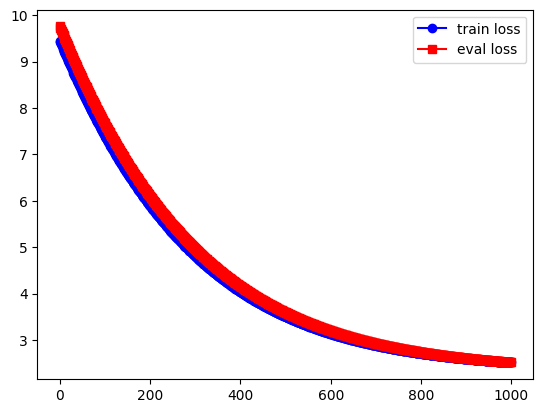

In [51]:
torch.manual_seed(42)

#setting the early stoppper
early_stopping = EarlyStopping(tolerance=3, min_delta=0.000001)

# Set the number of epochs
epochs = 1000
epochs_count = []
train_loss_values = []
eval_loss_values  = []

# Put data to target device
x_train_s_ten, y_train_s_ten = x_train_s_ten.to(device), y_train_s_ten.to(device)
x_test_s_ten, y_test_s_ten = x_test_s_ten.to(device), y_test_s_ten.to(device)
x_valid_s_ten, y_valid_s_ten = x_valid_s_ten.to(device), y_valid_s_ten.to(device)

# Build training and evaluation loop
for epoch in range(epochs):

    epochs_count.append(epoch)

    ### Training
    model_0.train()

    y_pred_train = model_0(x_train_s_ten).squeeze() # squeeze to remove extra `1` dimensions

    loss = loss_fn(y_pred_train,y_train_s_ten)
    train_loss_values.append(100*loss.detach().numpy())

    #Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        #Forward pass
        y_pred_test = model_0(x_valid_s_ten.squeeze())
        #Caculate loss
        test_loss = loss_fn(y_pred_test,y_valid_s_ten)
        eval_loss_values.append(100*test_loss.detach().numpy())

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.7f} | Test loss: {test_loss:.7f} ")

        #the prediction plot
        y_pred_valid = y_pred_test.detach().numpy()
        y_valid_s_nmp = y_valid_s_ten.cpu().numpy()

        max_range = max(max(y_pred_valid), max(y_valid_s))

        # Set both axes from 0 to max_range
        #plt.xlim(0, max_range)
        #plt.ylim(0, max_range)

        # Ensure equal scaling on both axes
        #plt.gca().set_aspect('equal', adjustable='box')

        # Add grid and labels (optional)
        #plt.xlabel('Predictions')
        #plt.ylabel('True Values')
        #plt.grid(True)

        #plt.scatter(y_pred_valid,y_valid_s, color='red', linestyle='-', marker='o')
        #plt.show()


    # EarlyStopping callback setup
    #early_stop_callback = EarlyStopping(
    #  monitor="val_loss",  # Metric to monitor
    #  patience=3,          # How many epochs to wait for improvement
    #  verbose=True,        # Print messages when early stopping is triggered
    #  mode="min"           # We want to minimize the monitored metric
    #)

    #early stopping
    early_stopping(test_loss)
    if early_stopping.early_stop:
      print(f"We are at epoch: {epoch}")
      break

plt.plot(epochs_count,train_loss_values, label="train loss", color="blue", marker="o")
plt.plot(epochs_count,eval_loss_values, label="eval loss", color="red", marker="s")
plt.legend()
plt.show()


to evaluate with unseen data set which is considred as test set

I recieved an error: means that you're trying to convert a PyTorch tensor (which has requires_grad=True) directly to a NumPy array. PyTorch doesn't allow this because tensors with requires_grad=True track gradients for backpropagation.
You need to detach the tensor from the computation graph before converting it to a NumPy array.

In [52]:
y_preds = model_0(x_test_s_ten).detach().numpy()

if isinstance(y_test_s_ten, torch.Tensor):
    print("tensor_var is a PyTorch tensor")

# Check if it's a NumPy array
if isinstance(y_test_s_ten, np.ndarray):
    print("array_var is a NumPy array")

tensor_var is a PyTorch tensor


In [53]:
y_preds = model_0(x_test_s_ten)
test_loss = loss_fn(y_preds,y_test_s_ten)

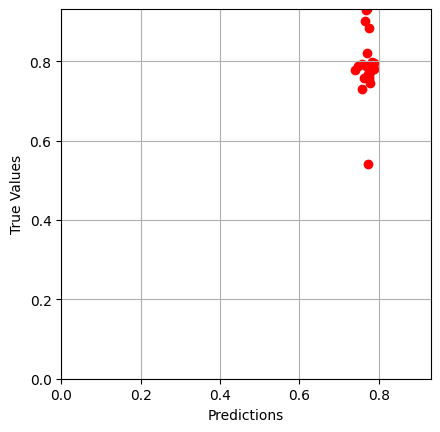

[[0.77773786]
 [0.7761686 ]
 [0.768744  ]
 [0.7833934 ]
 [0.77114856]
 [0.77997994]
 [0.77148044]
 [0.78729045]
 [0.77394766]
 [0.76848876]
 [0.77324045]
 [0.7566583 ]
 [0.7650449 ]
 [0.7882449 ]
 [0.775774  ]
 [0.74015355]
 [0.7586693 ]
 [0.77826655]
 [0.775774  ]
 [0.78091246]
 [0.7479732 ]
 [0.7616673 ]
 [0.7807018 ]] [[0.77214587]
 [0.88249487]
 [0.9280067 ]
 [0.7987016 ]
 [0.93117845]
 [0.78763765]
 [0.81987053]
 [0.7946452 ]
 [0.53994274]
 [0.78807884]
 [0.7664665 ]
 [0.7924324 ]
 [0.9015996 ]
 [0.77996606]
 [0.7601973 ]
 [0.77767897]
 [0.7287748 ]
 [0.7446335 ]
 [0.7563615 ]
 [0.782548  ]
 [0.78726846]
 [0.7587949 ]
 [0.7767943 ]]


In [54]:
y_preds = model_0(x_test_s_ten).detach().numpy()
#plt.gca().set_aspect('equal')
#plt.axhline(0, color='black',linewidth=0.5)
#plt.axvline(0, color='black',linewidth=0.5)
y_test_s = y_test_s_ten.cpu().numpy()

max_range = max(max(y_preds), max(y_test_s))

# Set both axes from 0 to max_range
plt.xlim(0, max_range)
plt.ylim(0, max_range)

# Ensure equal scaling on both axes
plt.gca().set_aspect('equal', adjustable='box')

# Add grid and labels (optional)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.grid(True)

plt.scatter(y_preds,y_test_s, color='red', linestyle='-', marker='o')
plt.show()
print(y_preds, y_test_s)